<a href="https://colab.research.google.com/github/sauravakolia/OSIC-Pulmonary-/blob/master/OSIC(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install fastai2

     |████████████████████████████████| 184kB 2.8MB/s 


In [3]:
!wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:79.0) Gecko/20100101 Firefox/79.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20604/1357052/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597072573&Signature=dskFFZBsjMd7BGvE6Im62nA%2FfvUvpnj2E0mm6QJYzx2EIgjZPGtiPipNOlc8vnwd6GbYOAD%2BX13tWo7%2B7g4FwMHrkXB0Wbk4tvRg5fzifDxgRcpRsfolSrLHwy5K0lZiG41h1TJJ6nTmrJ%2FWlVeEfEteut8sssbztvHuZ4Xs%2FJy8i7fq28BALW5X6mzGtf9b6QTbOOqOMjTHi%2FS%2Bn25uWtyXLM4ma%2FFxU%2Be9f15wLLFXsDuAzDTEQ0oQCGe0J2tKZ9rqNTmOB93aeCqwAUqtdNlUeBQOSJrhWCQwiGfz9x%2FWz6iaW51IXAksukD1EE32rmEH04D3zfRYrZhypDNLuA%3D%3D&response-content-disposition=attachment%3B+filename%3Dosic-pulmonary-fibrosis-progression.zip' --output-document 'osic-pulmonary-fibrosis-progression.zip'

--2020-08-08 08:13:06--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20604/1357052/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597072573&Signature=dskFFZBsjMd7BGvE6Im62nA%2FfvUvpnj2E0mm6QJYzx2EIgjZPGtiPipNOlc8vnwd6GbYOAD%2BX13tWo7%2B7g4FwMHrkXB0Wbk4tvRg5fzifDxgRcpRsfolSrLHwy5K0lZiG41h1TJJ6nTmrJ%2FWlVeEfEteut8sssbztvHuZ4Xs%2FJy8i7fq28BALW5X6mzGtf9b6QTbOOqOMjTHi%2FS%2Bn25uWtyXLM4ma%2FFxU%2Be9f15wLLFXsDuAzDTEQ0oQCGe0J2tKZ9rqNTmOB93aeCqwAUqtdNlUeBQOSJrhWCQwiGfz9x%2FWz6iaW51IXAksukD1EE32rmEH04D3zfRYrZhypDNLuA%3D%3D&response-content-disposition=attachment%3B+filename%3Dosic-pulmonary-fibrosis-progression.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 108.177.12.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14332865109 (13G) [application/zip]
Saving to: ‘osic-pulm

In [4]:
%mkdir 'OSIC'

In [5]:
%cd "/content/OSIC"

/content/OSIC


In [6]:
import os
import zipfile

local_zip = '/content/osic-pulmonary-fibrosis-progression.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [7]:
!rm /content/osic-pulmonary-fibrosis-progression.zip

In [8]:
!pip install pydicom
!pip install kornia

     |████████████████████████████████| 35.5MB 90kB/s 
     |████████████████████████████████| 204kB 2.8MB/s 


In [9]:
from fastai2.basics           import *
from fastai2.medical.imaging  import *

In [10]:
import numpy as np 
import pandas as pd 
import pydicom as dcm
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


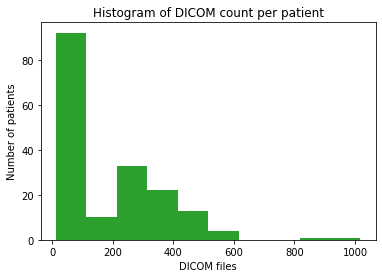

In [11]:
patient_sizes = [len(os.listdir('/content/OSIC/train/' + d)) for d in os.listdir('/content/OSIC/train')]
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient');

*Therefore their are lots of patients with dicom files<100*

**Train data**

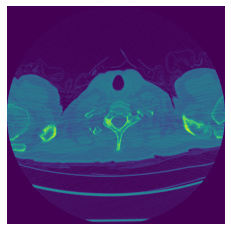

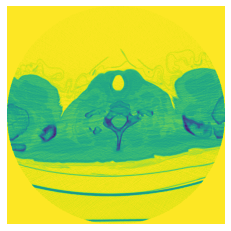

In [12]:
r = dcm.dcmread('/content/OSIC/train/ID00007637202177411956430/1.dcm')
img = r.pixel_array
img[img == -2000] = 0

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

 DICOM file Information

In [13]:
dataset = dcm.dcmread('/content/OSIC/train/ID00007637202177411956430/1.dcm')

In [14]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12297650151329871895440507938349160734
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

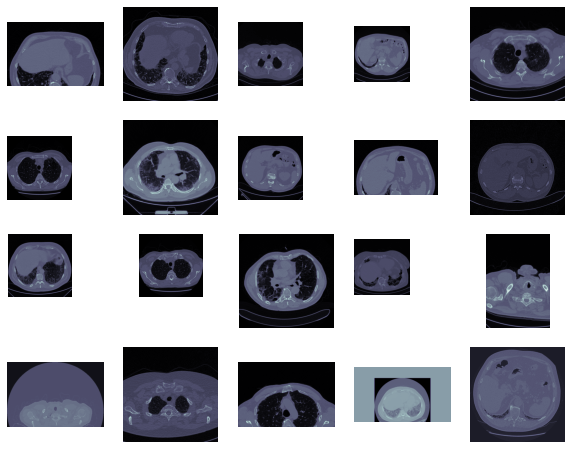

In [15]:
files = glob.glob('/content/OSIC/train/*/*.dcm')
def dicom_to_image(filename):
    im = dcm.dcmread(filename)
    img = im.pixel_array
    img[img == -2000] = 0
    return img
f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

*ALL DICCOM Images of a patient*

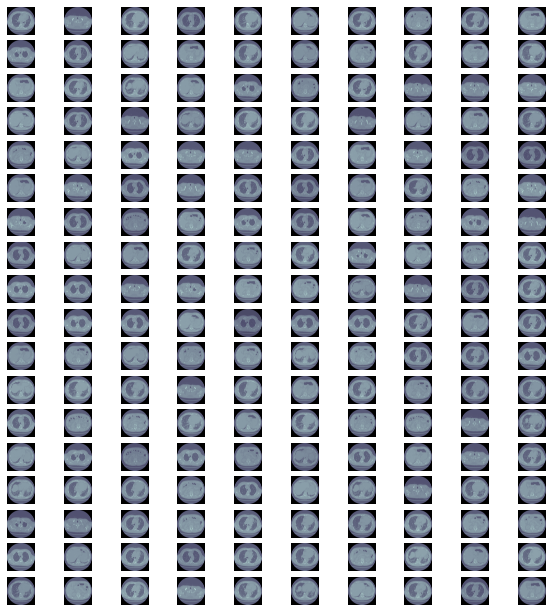

In [16]:
f, plots = plt.subplots(18, 10, sharex='all', sharey='all', figsize=(10, 11))
pat = glob.glob('/content/OSIC/train/ID00422637202311677017371/*.dcm')
for i in range(180):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(dcm.dcmread(pat[i]).pixel_array, cmap=plt.cm.bone)

This patient in particular has 423 slices (which is quite a lot) and we have indexed on only a few of these samples. All of this patient's slices are circular.

USING fastai.medical

Now We use "systematic windowing" which was previously used by radiologists with regards to the brain and fastai provide various windowing techniques.

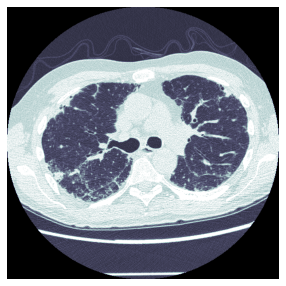

In [20]:
fn = Path('/content/OSIC/train/ID00007637202177411956430/')
fname = Path('/content/OSIC/train/ID00007637202177411956430/13.dcm')
dcom = fname.dcmread()
dcom.show(scale=dicom_windows.lungs)

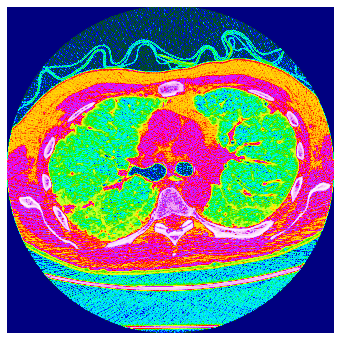

In [22]:
dcom.show(cmap=plt.cm.gist_ncar, figsize=(6,6))

The turbo colormap exposes the amount of empty space that we have in the image.

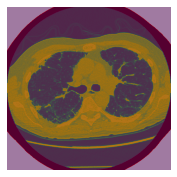

In [23]:
mask = dcom.mask_from_blur(dicom_windows.lungs)
wind = dcom.windowed(*dicom_windows.lungs)

_,ax = subplots(1,1)
show_image(wind, ax=ax[0])
show_image(mask, alpha=0.5, cmap=plt.cm.Reds, ax=ax[0]);

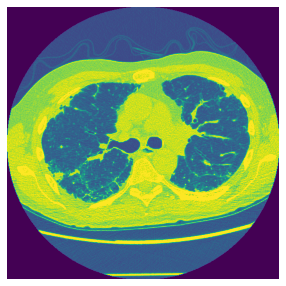

In [24]:
bbs = mask2bbox(mask)
lo,hi = bbs
show_image(wind[lo[0]:hi[0],lo[1]:hi[1]]);

Now we can isolate the lungs from the empty space.


In [29]:
path = Path('/content/OSIC/train/ID00007637202177411956430/')
def fix_pxrepr(dcm):
    if dcm.PixelRepresentation != 0 or dcm.RescaleIntercept<-100: return
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x>=px_mode] = x[x>=px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000



The above basically just fixes up the pixel representation attribute of the DICOM file for us to use.


In [30]:
def dcm_tfm(fn): 
    fn = (path/fn).with_suffix('.dcm')
    try:
        x = fn.dcmread()
        fix_pxrepr(x)
    except Exception as e:
        pass
    if x.Rows != 512 or x.Columns != 512: x.zoom_to((512,512))
    px = x.scaled_px
    return TensorImage(px.to_3chan(dicom_windows.lungs,dicom_windows.subdural, bins=None))

This basically reads in a DICOM file, fixes up its pixel representation attribute  and it then returns a Tensor image

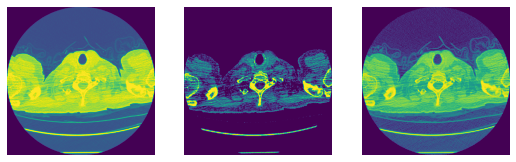

In [31]:
show_images(dcm_tfm('1'))



The above is basically just our earlier image in Tensor format for a neural network to utilize.


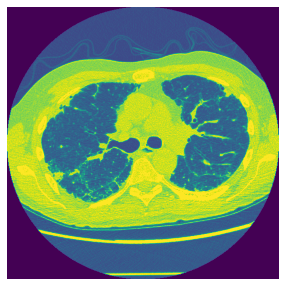

In [32]:
px = dcom.windowed(*dicom_windows.lungs)
show_image(px);

This crops out the above neatly to leave just the lungs remaining right where we want them. However

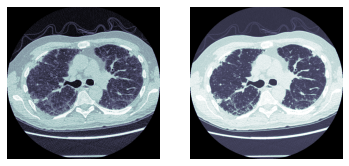

In [33]:
_,axs = subplots(1,2)
dcom.show(ax=axs[0]);   dcom.show(dicom_windows.lungs, ax=axs[1])

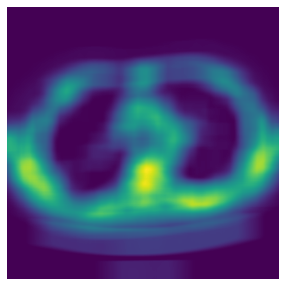

In [34]:
gdcm = gauss_blur2d(dcom.windowed(*dicom_windows.brain), 100) # using the brain for visualization purposes
show_image(gdcm);

Now take the segment from the blurr image


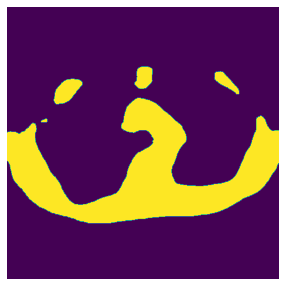

In [35]:
show_image(gdcm>0.3);

Now converting the diccom file to dataframe

In [40]:
df = pd.DataFrame.from_dicoms(fn.ls())
df.head()

,SpecificCharacterSet,ImageType,SOPInstanceUID,Modality,Manufacturer,ManufacturerModelName,PatientName,PatientID,PatientSex,DeidentificationMethod,BodyPartExamined,SliceThickness,KVP,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,TableHeight,RotationDirection,XRayTubeCurrent,GeneratorPower,FocalSpots,ConvolutionKernel,PatientPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,InstanceNumber,ImagePositionPatient,ImageOrientationPatient,FrameOfReferenceUID,PositionReferenceIndicator,SliceLocation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,PixelPaddingValue,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,RescaleType,fname,MultiImageType,ImageType1,ImageType2,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,ORIGINAL,2.25.25881604343955708749088278534768316755,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,19,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-249.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,/content/OSIC/train/ID00007637202177411956430/19.dcm,1,PRIMARY,AXIAL,1,-153.5,-249.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2913,100.585690,1176.212015,0.073597
1,ISO_IR 100,ORIGINAL,2.25.12297650151329871895440507938349160734,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,1,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-69.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,/content/OSIC/train/ID00007637202177411956430/1.dcm,1,PRIMARY,AXIAL,1,-153.5,-69.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2842,-1.454884,1137.488858,0.058094
2,ISO_IR 100,ORIGINAL,2.25.166203460060690684917706433659833135569,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,29,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-349.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,/content/OSIC/train/ID00007637202177411956430/29.dcm,1,PRIMARY,AXIAL,1,-153.5,-349.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,3166,210.377762,1217.328780,0.075508
3,ISO_IR 100,ORIGINAL,2.25.92642332099168274680551392372053060,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,6,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-119.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,/content/OSIC/train/ID00007637202177411956430/6.dcm,1,PRIMARY,AXIAL,1,-153.5,-119.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,3070,43.976032,1165.153031,0.060959
4,ISO_IR 100,ORIGINAL,2.25.48082271702840338181689885626916824964,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,4,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-99.75,1,MONOCHROME2,512,512,0.652344,16